# Traditonal Approch 

##**Import Files**

In [4]:
# import the file
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

train_dataset = pd.read_csv("/content/drive/MyDrive/train (1).csv")
train = train_dataset[['LotArea', 'GrLivArea','SalePrice', 'OverallQual',  'GarageCars', 'GarageArea', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearRemodAdd', 'FullBath', 'TotalBsmtSF','Fireplaces']]
test_dataset = pd.read_csv("/content/drive/MyDrive/test (2).csv")
test = test_dataset[['LotArea', 'GrLivArea', 'OverallQual', 'GarageCars', 'GarageArea', 'OverallQual','1stFlrSF', 'TotRmsAbvGrd','YearRemodAdd', 'FullBath', 'TotalBsmtSF','Fireplaces']]
result = test_dataset[['Id']]
#
# , 'FullBath', 'TotalBsmtSF','Fireplaces', 'GarageCars', 'GarageArea', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearRemodAdd'
# your training data we will be using in the model
xs = train.drop(columns = ['SalePrice'])
ys = train['SalePrice']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Visualize the data**

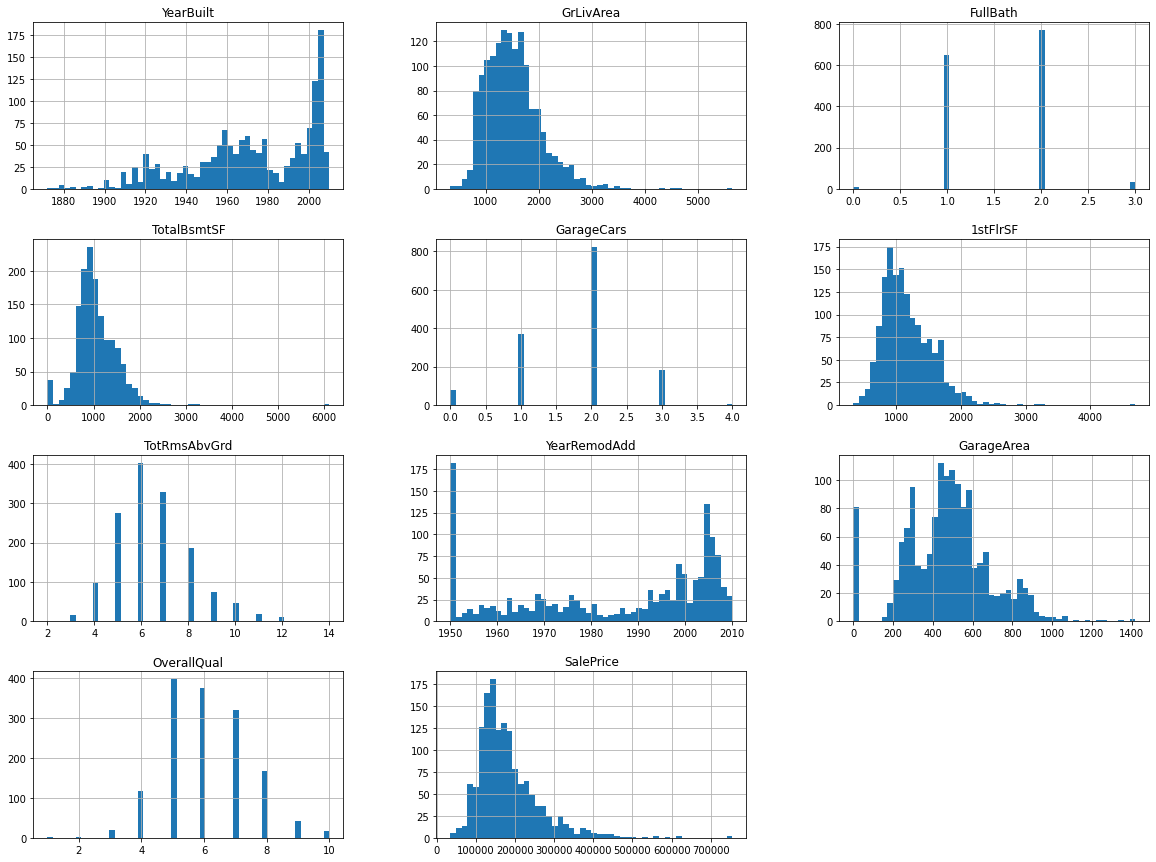

In [3]:
% matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins = 50, figsize=(20,15))
plt.show()


##  **Find Correlation**

In [4]:
# find correlations between salesprice and other attriutes

corr_matrix = train_dataset.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84b8854cd0>,
      dtype=object)

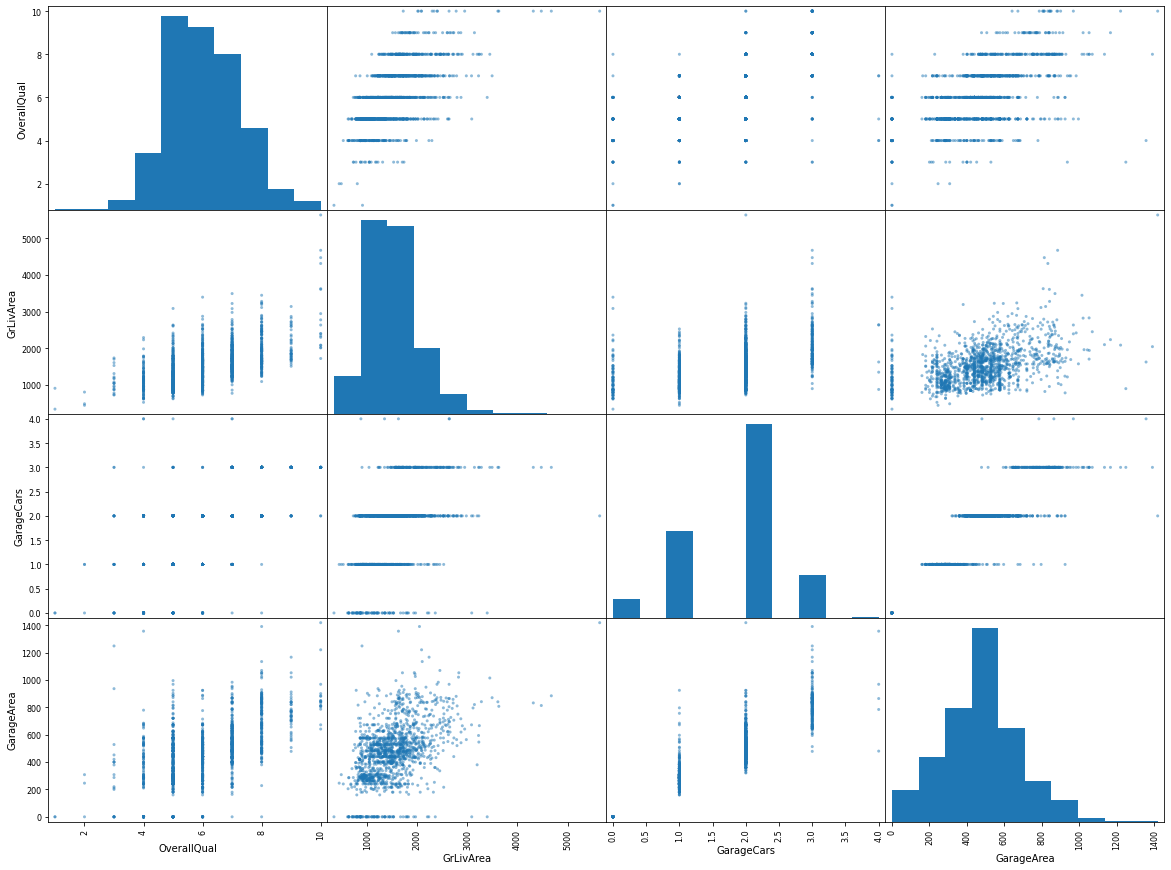

In [5]:
# use scatter_matrix to plot correaltions of attributes

import pandas as pd
from pandas.plotting import scatter_matrix
attribute = ['OverallQual','GrLivArea','GarageCars','GarageArea']
scatter_matrix(train_dataset[attribute], figsize=(20,15))

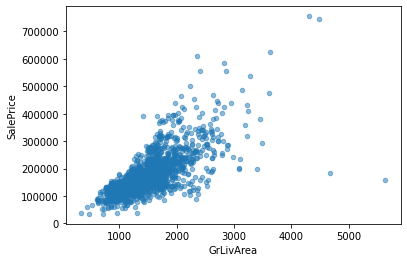

In [6]:
# playing with various graphs 

train_dataset.plot(kind = 'scatter', x='GrLivArea', y = 'SalePrice', alpha = 0.5)

## **Data Cleaning**
to get rid of missing values in the training dataset, we can use the following fucntion
*   drop() - to remove the entire attribute.
*   dropna() - to remove the NA values if any.
*   fillna() - to replace NA with certain value; 0 or median.





In [47]:
sklearn has a built in function to replace missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(xs)

In [22]:
# check if the data contains any null values
train.isna().any()
train.isna().sum()
train.fillna(0, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## **Handling text & categorical attribute**

In [6]:
# WE ARE NOT USING ONE-HOT-CODING THIS IS JUST EXAMPLE
# sklearn label_encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_cat = train_dataset['LotShape']
train_cat_encode = encoder.fit_transform(train_cat)

# we will now be using Onehotencoding to assign binary values
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
xs_cat_hot1 = encoder.fit_transform(train_cat_encode.reshape(-1,1))
xs_cat_hot1.toarray()


# we can perform both the fucntions in one shot using LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
xs_cat_hot1 = encoder.fit_transform(train_cat)
xs_cat_hot1

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [30]:
# linear regresion 

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xs,ys)

# calcuting R-square
linreg.score(xs,ys)

0.7792955655339466

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# train the model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(xs,ys)

# evaluate the model
predictions = tree_reg.predict(xs)
tree_mse = mean_squared_error(predictions, ys)
tree_mse = np.sqrt(tree_mse)
tree_mse

287.1178842427876

In [8]:
# evalute the models

from sklearn.model_selection import cross_val_score
score = cross_val_score(tree_reg,xs,ys,scoring = 'neg_mean_squared_error', cv = 10)
rmse_score = np.sqrt(-score)

def display_score(scores):
  print("score:",scores)
  print("mean:", scores.mean())
  print("std:", scores.std())

display_score(rmse_score)

score: [41493.3135725  40769.76086362 34610.11135739 52509.01315006
 45167.94625268 35310.62429432 34929.45546344 33284.14002914
 54083.85625715 40766.09876747]
mean: 41292.43200077797
std: 7000.700296636038


In [9]:
# random forest tree model evaluation
# std measures the precision of the model


from sklearn.ensemble import RandomForestRegressor
forest_rand = RandomForestRegressor()
forest_rand.fit(xs,ys)

forest_prediction = forest_rand.predict(xs)
forest_rmse = mean_squared_error(forest_prediction, ys)
forest_rmse = np.sqrt(forest_rmse)
forest_rmse

forest_score = cross_val_score(forest_rand,xs,ys,scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_score = np.sqrt(-forest_score)
display_score(forest_rmse_score)

score: [28185.35451133 28158.63350277 23799.07940224 47364.92360273
 34862.29196582 25353.91933708 26210.24871908 25484.69874213
 35584.08301014 29934.90994798]
mean: 30493.8142741304
std: 6748.343205029178


In [101]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4, 5]},
 ]
forest_reg = RandomForestRegressor()
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
 scoring='neg_mean_squared_error')
grid_search.fit(xs,ys)

grid_search.best_params_


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 230.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

{'max_features': 2, 'n_estimators': 30}

In [11]:
# clean the testing data


test.fillna(0, inplace=True)
test.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


LotArea         0
GrLivArea       0
OverallQual     0
GarageCars      0
GarageArea      0
OverallQual     0
1stFlrSF        0
TotRmsAbvGrd    0
YearRemodAdd    0
FullBath        0
TotalBsmtSF     0
Fireplaces      0
dtype: int64

## **Prediction**

In [12]:
final_model = forest_rand


final_predictions = final_model.predict(test)
result['SalePrice'] = final_predictions
print(result)

result.to_csv("submission_final_3.csv", index = None)

        Id  SalePrice
0     1461  129784.50
1     1462  141592.40
2     1463  168698.32
3     1464  180939.00
4     1465  202984.68
...    ...        ...
1454  2915   79208.00
1455  2916   80783.00
1456  2917  163706.98
1457  2918  105753.00
1458  2919  236147.90

[1459 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# **Neural Network Approch**

In [ ]:
# check you data
train.head()
test.head()

,LotArea,YearBuilt,GrLivArea,FullBath,TotalBsmtSF,Fireplaces,GarageArea,OverallQual
0,11622,1961,896,1,882.0,0,730.0,5
1,14267,1958,1329,1,1329.0,0,312.0,6
2,13830,1997,1629,2,928.0,1,482.0,5
3,9978,1998,1604,2,926.0,1,470.0,6
4,5005,1992,1280,2,1280.0,0,506.0,8


In [14]:
# build the model 

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt

# input layer of model
model = tf.keras.models.Sequential([tf.keras.layers.Dense(12, activation = 'relu', input_shape = [12]),
# middle layer of model
tf.keras.layers.Dense(8, activation = 'relu'),
# output layer of model
tf.keras.layers.Dense(1)])

model.compile(optimizer='Adam', loss='mse')
model.fit(xs,ys, epochs=100)


 


Epoch 1/100
46/46 [==============================] - 4s 2ms/step - loss: 39805657088.0000
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 38426099712.0000
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 36653174784.0000
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 33422247936.0000
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 28964173824.0000
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 23634153472.0000
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 18092382208.0000
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 13801699328.0000
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 11159798784.0000
Epoch 10/100
46/46 [==============================] - 0s 2ms/step - loss: 9808320512.0000
Epoch 11/100
46/46 [==============================] - 0s 2ms/step - loss: 9132875776.0000
Epoch 12/1

In [15]:
classification = model.predict(test)
result['SalePrice'] = classification
print(result)

result.to_csv("submission.csv", index = None)

        Id      SalePrice
0     1461  227206.046875
1     1462  262683.812500
2     1463  250530.546875
3     1464  248040.546875
4     1465  260344.937500
...    ...            ...
1454  2915  158176.828125
1455  2916  173499.359375
1456  2917  265739.843750
1457  2918  193460.453125
1458  2919  280735.781250

[1459 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
model.save('House_prediction.h5')